<a href="https://colab.research.google.com/github/farahshahhoud/Machine_Learning/blob/master/PK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## набор данных

Мы собираемся изучить набор данных о футбольных матчах, которые проходили на чемпионате мира 2018 года в России.  
База данных состоит из информации о производительности каждой команды в каждом футбольном матче, который он сыграл. Эта информация будет частью построения модели машинного обучения, которая будет предсказывать, получит ли эта команда награду «Man of the Match.  
Давайте сначала посмотрим на наш набор данных и увидим некоторые его строки.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('FIFA 2018.csv', sep=",")

In [0]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Вот все атрибуты, которые наш набор данных содержит с их объяснениями.

1. **Date:** Match Date
2. ***Team:*** Playing Team
3. ***Opponent:*** Opponent Team
4. ***Goal Scored:*** Number of goals scored by this team
5. ***Ball Possession %:*** Amount of time ball was in control by the team
5. ***Attempts:*** Number of attempts to score goal
6. ***On-Target:*** Number of shots on-target
7. ***Off-Target:*** Number of shots that went off-target
8. ***Blocked:*** Number of opponent team's attempts blocked by the team
9. ***Corners:*** Number of corner shots used
10. ***Offsides:*** Number of off-side events
11. ***Free Kicks:*** Number of free-kicks used
12. ***Saves:*** Number saves by the goal keeper
13. ***Pass Accuracy %:*** Percentage of passes that reached the same team player as aimed
14. ***Passes:*** Total number of passes by the team
15. ***Distance Covered (Kms):*** Total distance covered by the team members in this game
15. ***Fouls Committed:*** Number of fouls committed by the team members
16. ***Yellow Card:*** Number of Yellow warning received
17. ***Yellow & Red:*** Number of Yellow & Red warning received
18. ***Red:*** Number of Red cards received
17. ***Man of the Match:*** Did this team member win Man of the Match?
18. ***1st Goal:*** When did the team score the 1st goal?
19. ***Round:*** Stage of the match
19. ***PSO:*** Was there a penalty shootout (PSO) in this match?
20. ***Goals in PSO:*** Number of goals scored in the Penalty shootout
21. ***Own goals:*** Number of own goals
22. ***Own goal Time:*** When did the team score own goal?

In [0]:
data.shape

(128, 27)

In [0]:
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

## 1. Обработка пропусков в данных¶


In [0]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

Мы видим, что только три из наших столбцов имеют нулевое значение.

In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 128


In [0]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((128, 27), (128, 24))

In [0]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((128, 27), (7, 27))

Если мы удалили столбцы, содержащие нулевое значение, мы получим 24 вместо 27.  
Если мы удалили строку, содержащую нулевые значения, мы получим только 7 строк.  
Процент пустых значений в трех столбцах:

In [0]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1st Goal. Тип данных float64. Количество пустых значений 34, 26.56%.
Колонка Own goals. Тип данных float64. Количество пустых значений 116, 90.62%.
Колонка Own goal Time. Тип данных float64. Количество пустых значений 116, 90.62%.


В первом столбце указано время для первого гола, забитого командой. Это называется '1st Goal'.  
Во втором столбце указано количество голов, которые команда поставила в пользу команды соперника (внутри своей сети). Это называется 'Own goals'.  
Третий описывает время, когда команда забила гол против себя. Это называется 'Own goal Time'

In [0]:
data_num = data[num_cols]
data_num

,1st Goal,Own goals,Own goal Time
0,12.0,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,89.0,NaN,NaN
4,NaN,1.0,90.0
...,...,...,...
123,5.0,NaN,NaN
124,4.0,NaN,NaN
125,NaN,NaN,NaN
126,18.0,1.0,18.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


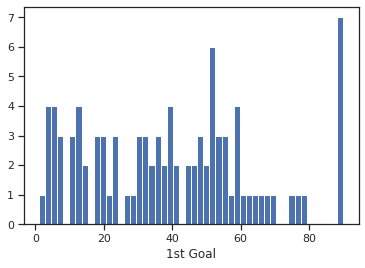

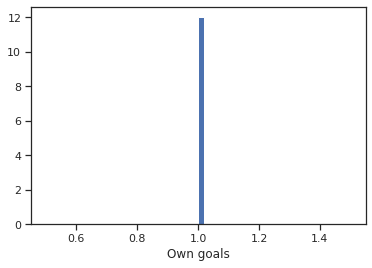

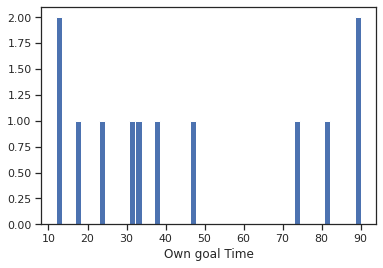

In [0]:
for col in data_num:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

In [0]:
flt_index1 = data[data['1st Goal'].isnull()].index
flt_index2 = data[data['Own goals'].isnull()].index
flt_index3 = data[data['Own goal Time'].isnull()].index

In [0]:
data_num[data_num.index.isin(flt_index1)]['1st Goal']

1     NaN
2     NaN
4     NaN
12    NaN
15    NaN
16    NaN
18    NaN
23    NaN
25    NaN
35    NaN
37    NaN
38    NaN
43    NaN
44    NaN
47    NaN
49    NaN
62    NaN
65    NaN
72    NaN
73    NaN
74    NaN
81    NaN
82    NaN
84    NaN
88    NaN
90    NaN
94    NaN
105   NaN
109   NaN
112   NaN
114   NaN
116   NaN
121   NaN
125   NaN
Name: 1st Goal, dtype: float64

In [0]:
data_num[data_num.index.isin(flt_index2)]['Own goals']

0     NaN
1     NaN
2     NaN
3     NaN
5     NaN
       ..
122   NaN
123   NaN
124   NaN
125   NaN
127   NaN
Name: Own goals, Length: 116, dtype: float64

In [0]:
data_num[data_num.index.isin(flt_index3)]['Own goal Time']

0     NaN
1     NaN
2     NaN
3     NaN
5     NaN
       ..
122   NaN
123   NaN
124   NaN
125   NaN
127   NaN
Name: Own goal Time, Length: 116, dtype: float64

In [0]:
print (flt_index1.shape[0])
print (flt_index2.shape[0])
print (flt_index3.shape[0])

34
116
116


In [0]:
data['Own goal Time'].unique()

array([nan, 90., 81., 32., 37., 47., 23., 74., 33., 12., 13., 18.])

In [0]:
data['Own goals'].unique()

array([nan,  1.])

In [0]:
data['1st Goal'].unique()

array([12., nan, 89., 90.,  4., 24., 58., 62., 19., 23., 59., 32., 56.,
       35., 20., 50., 65., 47., 11., 39.,  6., 37., 60., 54.,  7., 38.,
       34., 53., 49.,  5., 52., 18., 26., 48.,  8., 78., 40., 10., 45.,
       22., 14., 51., 76., 36., 31., 74., 33., 13., 41., 55.,  1., 69.,
       66., 57., 30., 68., 28.])

Столбец «Own goal» имеет значения один или нан. Из спортивной информации мы видим, что возможность забить более одного гола за команду против себя редка. Таким образом, мы можем ожидать, что для всех значений Nan логическое значение равно 0.

In [0]:
data_num[data_num['Own goals'].isnull()]['Own goal Time'].isnull().sum()

116

Здесь мы увидели, что когда значение «Own goals» равно нулю, тогда значение столбца «Own goal Time» также равно нулю. Таким образом, если мы заменим значения Nan на нули, тогда мы должны установить время также равным нулю. Что будет указывать на то, что это событие никогда не происходило.

In [0]:
data[data_num['1st Goal'].isnull()]['Goal Scored']==0

1       True
2       True
4       True
12      True
15      True
16      True
18      True
23      True
25      True
35      True
37      True
38      True
43      True
44      True
47      True
49      True
62      True
65      True
72      True
73      True
74      True
81      True
82      True
84      True
88      True
90      True
94      True
105     True
109     True
112     True
114    False
116     True
121     True
125     True
Name: Goal Scored, dtype: bool

Чтобы понять, почему столбец целей «1st Goal» имеет нулевое значение, мы рассмотрим «Goal Scored», в которых описано, сколько голов забил команда. И мы видим, что когда команда не забила ни одного гола, тогда время первого гола устанавливается равным нулю, за исключением одного значения.  
Мы попытаемся получить дополнительную информацию об этой точке, чтобы увидеть спецификацию совпадения через ее строку.

In [0]:
data.loc[[114]]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
114,06-07-2018,Brazil,Belgium,1,57,26,9,7,10,8,1,16,2,89,557,104,14,2,0,0,No,NaN,Quarter Finals,No,0,1.0,13.0


В этой строке есть значение атрибута 'Goals scored'. Таким образом, должно быть значение атрибута «1st Goal».   Давайте посмотрим описание значений в столбце «1st Goal».

In [0]:
data_num_1stGoal = data_num[['1st Goal']]
data_num_1stGoal.head()

,1st Goal
0,12.0
1,NaN
2,NaN
3,89.0
4,NaN


In [0]:
data_num_1stGoal.describe()

,1st Goal
count,94.000000
mean,39.457447
std,24.496506
min,1.000000
25%,18.250000
50%,39.000000
75%,54.750000
max,90.000000


Мы можем заполнить атрибут значением среднего или наиболее частым значением из столбца.

Наконец, чтобы заменить значения NaN, мы решили:  
1. Заполните все нулевые значения «Own goals» нулями
2. Заполните все «Own goal Time» нулями
3. Заполните все нулевые значения «1st Goal» нулями, ожидаемыми для значения в строке 114, которое должно быть заполнено средним значением.

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [0]:
pd.options.mode.chained_assignment = None
data['1st Goal'][114]=int(data_num_1stGoal.mean())

In [0]:
def test_num_impute_col(dataset, column):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy='constant',fill_value=0)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, filled_data.size,data_num_imp

In [0]:
new_1s_Goal=test_num_impute_col(data, '1st Goal')

In [0]:
new_Own_goals=test_num_impute_col(data, 'Own goals')

In [0]:
new_Own_goal_Time=test_num_impute_col(data, 'Own goal Time')

Для построения модели машинного обучения мы не должны зависеть от атрибута, который имеет высокий процент пропущенных данных. Таким образом, мы можем выполнить «Own goals» и «Own goal Time»

## 2. Преобразование категориальных признаков в числовые

В нашем наборе данных у нас есть шесть атрибутов типа объекта, которые необходимо преобразовать в числовые значения.  
Прежде всего мы рассмотрим, сколько уникальных значений содержат эти атрибуты:

In [0]:
data['Date'].unique()

array(['14-06-2018', '15-06-2018', '16-06-2018', '17-06-2018',
       '18-06-2018', '19-06-2018', '20-06-2018', '21-06-2018',
       '22-06-2018', '23-06-2018', '24-06-2018', '25-06-2018',
       '26-06-2018', '27-06-2018', '28-06-2018', '30-06-2018',
       '01-07-2018', '02-07-2018', '03-07-2018', '06-07-2018',
       '07-07-2018', '10-07-2018', '11-07-2018', '14-07-2018',
       '15-07-2018'], dtype=object)

In [0]:
data['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [0]:
data['Opponent'].isin(data['Team']).sum()

128

Мы рассмотрели, что все страны, которые отображаются в столбце «Opponent», существуют также внутри столбца «Team», чтобы использовать одну кодировку для обоих атрибутов.

In [0]:
data['Man of the Match'].unique()

array(['Yes', 'No'], dtype=object)

In [0]:
data['Round'].unique()

array(['Group Stage', 'Round of 16', 'Quarter Finals', 'Semi- Finals',
       '3rd Place', 'Final'], dtype=object)

In [0]:
data['PSO'].unique()

array(['No', 'Yes'], dtype=object)

Мы будем использовать LabelEncoder со столбцами, которые имеют много значений, таких как команды, раунд и дата.  
С Man of the Match и PSO, которые имеют только два значения, мы будем использовать фиктивный кодировщик.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
Teams_le = le.fit_transform(data['Team'])
np.unique(Teams_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [0]:
Rounds_le = le.fit_transform(data['Round'])
np.unique(Rounds_le)

array([0, 1, 2, 3, 4, 5])

In [0]:
pd.get_dummies(data['Man of the Match']).head()

,No,Yes
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [0]:
pd.get_dummies(data['PSO']).head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


## 3. Масштабирование данных

<img src="https://drive.google.com/uc?id=1ErsGINA9UUDExukzOsOAh4iT3Nv3Y6pu">

Поскольку между минимальным и максимальным значениями атрибута «Passes» имеется большой интервал, мы будем использовать MinMaxScalar ().

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
sc = MinMaxScaler()
Passes_sc = sc.fit_transform(data[['Passes']])

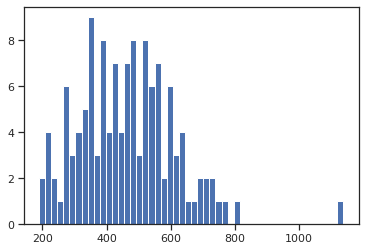

In [0]:
plt.hist(data['Passes'], 50)
plt.show()

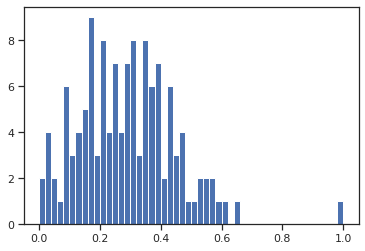

In [0]:
plt.hist(Passes_sc, 50)
plt.show()

чтобы лучше понять, как значения атрибута «Distance Covered» мы будем использовать нормализатор standardScalar

In [0]:
sc = StandardScaler()
Distance_sc = sc.fit_transform(data[['Distance Covered (Kms)']])

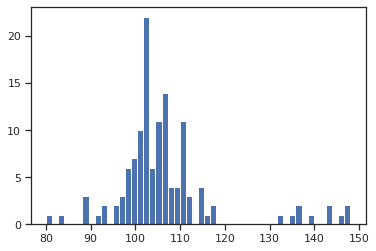

In [0]:
plt.hist(data['Distance Covered (Kms)'], 50)
plt.show()

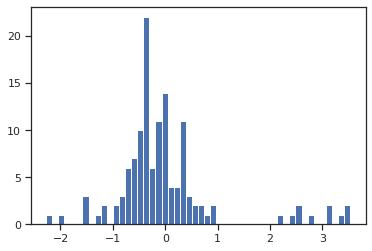

In [0]:
plt.hist(Distance_sc, 50)
plt.show()